In [1]:
%load_ext autoreload
%autoreload 2

import scripts.visualization as viz
viz.load_matplotlib()
plt = viz.plt

In [2]:
import pandas as pd
import seaborn as sns

def next_param(a: list, idx: int):
    return float(a[idx].split('=')[-1])

def load_results(path: str):
    a = path.split("/")[-1].split('_')[2:]
    beta = next_param(a, 0)
    gamma = next_param(a, 1)
    # kappa = next_param(a, 2)
    mu = next_param(a, 3)
    delta = next_param(a, 4)
    l = next_param(a, 5)
    xi = next_param(a, 6)
    n = float(a[7].split('=')[-1].split('e')[0])

    params = {r'\beta': beta, r'\gamma': gamma, r'\mu': mu,
              r'\delta': delta, r'\lambda': l, r'\xi': xi, 'n': n}
    return pd.read_csv(path, index_col=0), params

In [3]:
def plot_experiment1(res: pd.DataFrame, params: dict, vmin=0.15, vmax=0.30, title=None):
    ax = sns.heatmap(res, vmin=vmin, vmax=vmax)
    xlabels = [r'${:.2f}$'.format(float(s)) for s in list(res.columns)]
    ax.set_xticklabels(xlabels)
    ylabels = [r'${}$'.format(s) for s in list(res.index)]
    ax.set_yticklabels(ylabels)
    for item in ax.get_yticklabels():
        item.set_rotation(0)
    for item in ax.get_xticklabels():
        item.set_rotation(0)

    if not title:
        title = []
        counter = 1
        for k, v in params.items():
            t = r'${} = {}$'.format(k, v)
            if counter % 4 == 0:
                t += '\n'
            title.append(t)
            counter += 1
        plt.title(' '.join(title))
    else:
        plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('$q$')

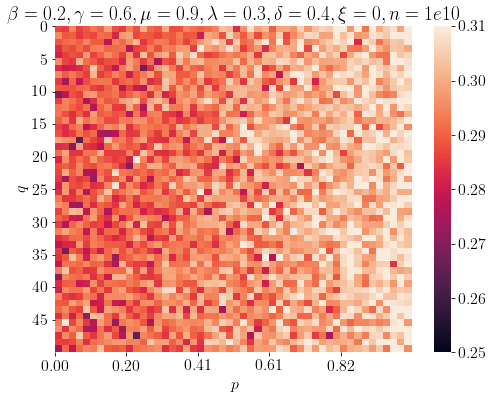

In [4]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.2_gamma=0.6_kappa=0.09999999999999998_mu=0.9_L2-delta=0.4_lambda=0.3_xi=0_n=10000000000.0experiment1.csv")

title=r'$\beta=0.2,\gamma=0.6,\mu=0.9, \lambda=0.3, \delta=0.4, \xi=0, n=1e10$'

ax = sns.heatmap(res, vmin=0.25, vmax=0.31)
xlabels = [r'${:.2f}$'.format(float(s)) for s in list(res.columns)]
ax.set_xticks(list(range(50))[::10])
ax.set_xticklabels(xlabels[::10])
ylabels = [r'${}$'.format(s) for s in list(res.index)]
ax.set_yticks(list(range(50))[::5])
ax.set_yticklabels(ylabels[::5])
for item in ax.get_yticklabels():
    item.set_rotation(0)
for item in ax.get_xticklabels():
    item.set_rotation(0)
plt.xlabel('$p$')
plt.ylabel('$q$')
plt.title(title)

# plt.savefig('../plots/experiment1/dead_ratio-beta=0.2-mu=0.9-lambda=0.3-delta=0.4-big.pdf')

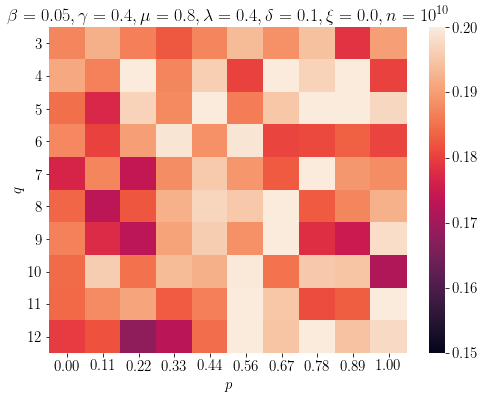

In [68]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=0_n=10000000000.0experiment1_small.csv")

title=r'$\beta=0.05,\gamma=0.4,\mu=0.8, \lambda=0.4, \delta=0.1, \xi=0.0, n=10^{10}$'
plot_experiment1(res, params, vmin=0.15, vmax=0.20, title=title)
# plt.savefig('../plots/experiment1/dead_ratio-beta=0.05_xi=0_n=1e10.pdf')

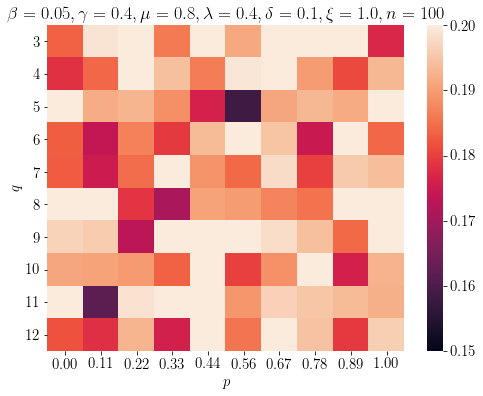

In [69]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=1000_n=100.0experiment1_small.csv")

title=r'$\beta=0.05,\gamma=0.4,\mu=0.8, \lambda=0.4, \delta=0.1, \xi=1.0, n=100$'
plot_experiment1(res, params, vmin=0.15, vmax=0.20, title=title)
# plt.savefig('../plots/experiment1/dead_ratio-beta=0.05_xi=1_n=100.pdf')

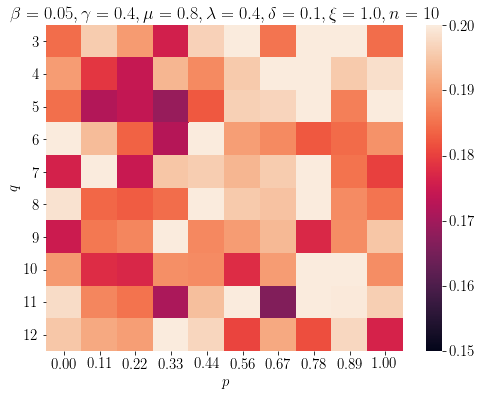

In [70]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=10_n=10.0experiment1_small.csv")

title=r'$\beta=0.05,\gamma=0.4,\mu=0.8, \lambda=0.4, \delta=0.1, \xi=1.0, n=10$'
plot_experiment1(res, params, vmin=0.15, vmax=0.20, title=title)
# plt.savefig('../plots/experiment1/dead_ratio-beta=0.05_xi=1_n=10.pdf')

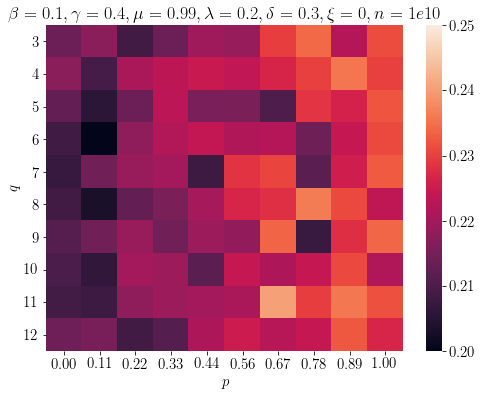

In [73]:
## different parameters

res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.1_gamma=0.4_kappa=0.010000000000000009_mu=0.99_L2-delta=0.3_lambda=0.2_xi=0_n=10000000000.0experiment1_small.csv")

title=r'$\beta=0.1,\gamma=0.4,\mu=0.99, \lambda=0.2, \delta=0.3, \xi=0, n=1e10$'
plot_experiment1(res, params, vmin=0.2, vmax=0.25, title=title)
# plt.savefig('../plots/experiment1/dead_ratio-beta=0.1-mu=0.99-lambda=0.2-delta=0.3.pdf')

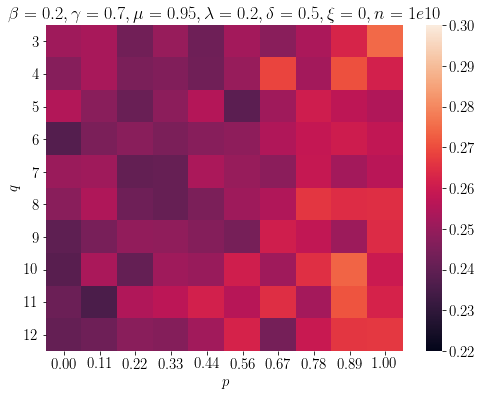

In [77]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.2_gamma=0.7_kappa=0.050000000000000044_mu=0.95_L2-delta=0.5_lambda=0.2_xi=0_n=10000000000.0experiment1_small.csv")

title=r'$\beta=0.2,\gamma=0.7,\mu=0.95, \lambda=0.2, \delta=0.5, \xi=0, n=1e10$'
plot_experiment1(res, params, vmin=0.22, vmax=0.30, title=title)
# plt.savefig('../plots/experiment1/dead_ratio-beta=0.2-mu=0.95-lambda=0.2-delta=0.5.pdf')

### Infected ratio


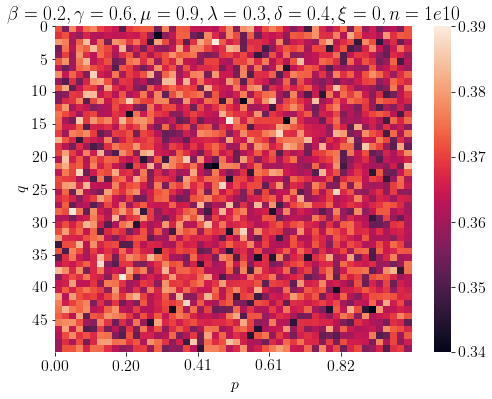

In [6]:
res, params = \
    load_results("../data/experiments/experiment1/recovered_ratio_L1-beta=0.2_gamma=0.6_kappa=0.09999999999999998_mu=0.9_L2-delta=0.4_lambda=0.3_xi=0_n=10000000000.0experiment1.csv")

title=r'$\beta=0.2,\gamma=0.6,\mu=0.9, \lambda=0.3, \delta=0.4, \xi=0, n=1e10$'

ax = sns.heatmap(res, vmin=0.34, vmax=0.39)
xlabels = [r'${:.2f}$'.format(float(s)) for s in list(res.columns)]
ax.set_xticks(list(range(50))[::10])
ax.set_xticklabels(xlabels[::10])
ylabels = [r'${}$'.format(s) for s in list(res.index)]
ax.set_yticks(list(range(50))[::5])
ax.set_yticklabels(ylabels[::5])
for item in ax.get_yticklabels():
    item.set_rotation(0)
for item in ax.get_xticklabels():
    item.set_rotation(0)
plt.xlabel('$p$')
plt.ylabel('$q$')
plt.title(title)

# plt.savefig('../plots/experiment1/infected_ratio-beta=0.2-mu=0.9-lambda=0.3-delta=0.4-big.pdf')

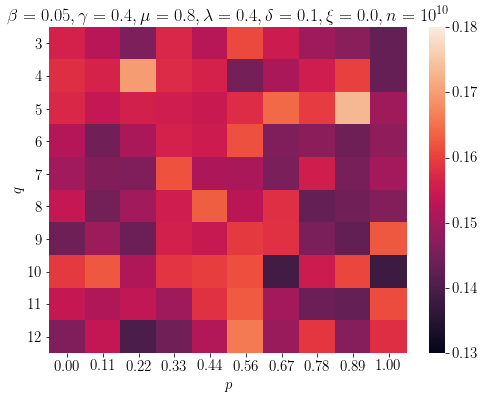

In [83]:
res, params = \
    load_results("../data/experiments/experiment1/recovered_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=0_n=10000000000.0experiment1_small.csv")

title=r'$\beta=0.05,\gamma=0.4,\mu=0.8, \lambda=0.4, \delta=0.1, \xi=0.0, n=10^{10}$'
plot_experiment1(res, params, vmin=0.13, vmax=0.18, title=title)
# plt.savefig('../plots/experiment1/infected_ratio-beta=0.05_xi=0_n=1e10.pdf')

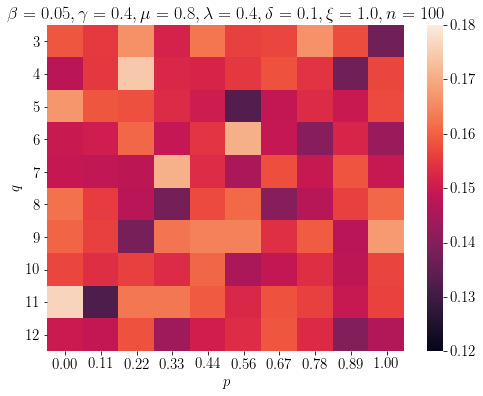

In [90]:
res, params = \
    load_results("../data/experiments/experiment1/recovered_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=1000_n=100.0experiment1_small.csv")

title=r'$\beta=0.05,\gamma=0.4,\mu=0.8, \lambda=0.4, \delta=0.1, \xi=1.0, n=100$'
plot_experiment1(res, params, vmin=0.12, vmax=0.18, title=title)
# plt.savefig('../plots/experiment1/infected_ratio-beta=0.05_xi=1_n=100.pdf')

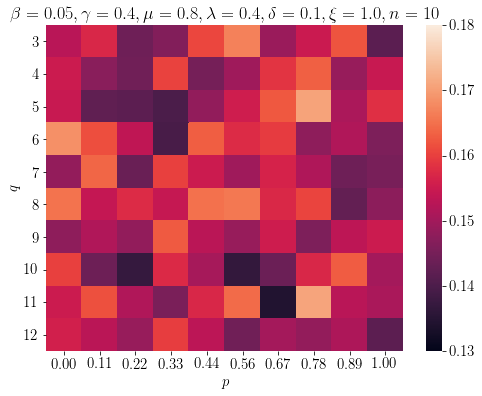

In [94]:
res, params = \
    load_results("../data/experiments/experiment1/recovered_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=10_n=10.0experiment1_small.csv")

title=r'$\beta=0.05,\gamma=0.4,\mu=0.8, \lambda=0.4, \delta=0.1, \xi=1.0, n=10$'
plot_experiment1(res, params, vmin=0.13, vmax=0.18, title=title)
# plt.savefig('../plots/experiment1/infected_ratio-beta=0.05_xi=1_n=10.pdf')

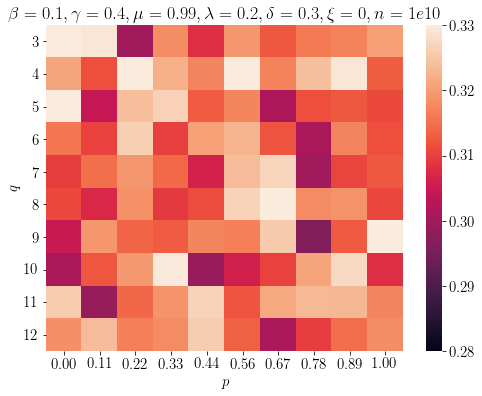

In [99]:
res, params = \
    load_results("../data/experiments/experiment1/recovered_ratio_L1-beta=0.1_gamma=0.4_kappa=0.010000000000000009_mu=0.99_L2-delta=0.3_lambda=0.2_xi=0_n=10000000000.0experiment1_small.csv")

title=r'$\beta=0.1,\gamma=0.4,\mu=0.99, \lambda=0.2, \delta=0.3, \xi=0, n=1e10$'
plot_experiment1(res, params, vmin=0.28, vmax=0.33, title=title)
# plt.savefig('../plots/experiment1/infected_ratio-beta=0.1-mu=0.99-lambda=0.2-delta=0.3.pdf')

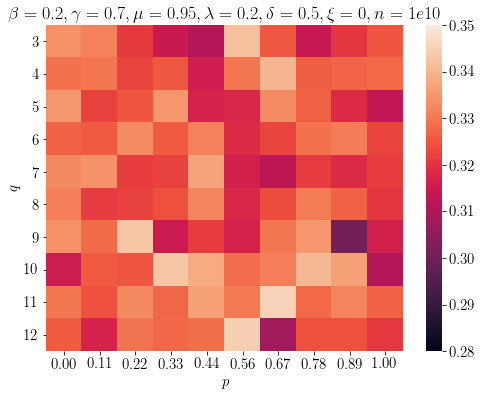

In [105]:
res, params = \
    load_results("../data/experiments/experiment1/recovered_ratio_L1-beta=0.2_gamma=0.7_kappa=0.050000000000000044_mu=0.95_L2-delta=0.5_lambda=0.2_xi=0_n=10000000000.0experiment1_small.csv")

title=r'$\beta=0.2,\gamma=0.7,\mu=0.95, \lambda=0.2, \delta=0.5, \xi=0, n=1e10$'
plot_experiment1(res, params, vmin=0.28, vmax=0.35, title=title)
# plt.savefig('../plots/experiment1/infected_ratio-beta=0.2-mu=0.95-lambda=0.2-delta=0.5.pdf')